# Customized Functions

In [1]:
# Define a function that calculates RMSLE
def RMSLE(y_true, y_pred):
    """
    Calculate the Root Mean Squared Logarithmatic Error (RMSLE) between true and predicted target values.
    Parameters:
        y_true: The true values of target variable
        y_pred: The predicted values of target variable
    Return:
        rmsle score
    """
    log_diff = np.log1p(y_pred) - np.log1p(y_true)
    rmsle_score = np.sqrt(np.mean(log_diff**2))
    return rmsle_score


# Define a function to get evaluation scores
def get_scores(model_name, model_obj, x_train, y_train, x_test, y_test):
    """
    Parameters:
        model_name: the name of the model
        model_obj: the model fit object       
        x_train: the training set of predictor variables
        y_train: the training set of the target variable
        x_test: the test set of the predictor variables
        y_test: the test set of the target variable
    Outputs:
        Print out all the evaluation score.
    Return:
        A list of model_name, rmsle score
        
    """ 
    
    print("♦ Model name: ", model_name)
    # Model fitteing
    model_obj.fit(x_train, y_train)
    
    # Predict on training set and test set
    y_train_pred = model_obj.predict(x_train)
    y_test_pred = model_obj.predict(x_test)
    
    # Convert predicted values and test values to original values by using exponential function.
    y_train_pred_exp = np.exp(y_train_pred)      
    y_train_exp = np.exp(y_train)
    y_test_pred_exp = np.exp(y_test_pred)
    y_test_exp = np.exp(y_test)
    
    # Evaluate predicted values using RMSLE score
    rmsle_train = RMSLE(y_train_exp, y_train_pred_exp)
    rmsle_test = RMSLE(y_test_exp, y_test_pred_exp)
    
    print(f"RMSLE on training set: {rmsle_train:.6f}")
    print(f"RMSLE on test set: {rmsle_test:.6f}")
    print("-"*50)
    
    return [model_name, rmsle_train, rmsle_test]


# Define a function to get the RMSLE score of cross-validation model
def get_scores_tuning(model_name, model_obj, x_train, y_train, x_test, y_test):
    """
    Parameters:
        model_name: the name of the model
        model_obj: the model fit object with best parameters
        x_train: the training set of predictor variables
        y_train: the training set of the target variable
        x_test: the test set of the predictor variables
        y_test: the test set of the target variable
    Outputs:
        Print out all the evaluation score.
    Return:
        A list of model_name, rmsle score
        
    """ 
    
    print("♦ Model name: ", model_name)
 
    # Predict on training set and test set
    y_train_pred = model_obj.predict(x_train)
    y_test_pred = model_obj.predict(x_test)
    
    # Convert predicted values and test values to original values by using exponential function.
    y_train_pred_exp = np.exp(y_train_pred)      
    y_train_exp = np.exp(y_train)
    y_test_pred_exp = np.exp(y_test_pred)
    y_test_exp = np.exp(y_test)
    
    # Evaluate predicted values using RMSLE score
    rmsle_train = RMSLE(y_train_exp, y_train_pred_exp)
    rmsle_test = RMSLE(y_test_exp, y_test_pred_exp)
    
    print(f"RMSLE on training set: {rmsle_train:.6f}")
    print(f"RMSLE on test set: {rmsle_test:.6f}")
    print("-"*50)
    
    return [model_name, rmsle_train, rmsle_test]



# Funtion to write pickle file
def write_pickle(model_obj, file_name:str):
    """
    Parameters: 
        model_obj: a model you want to save
        file_name: file name of the pickle file
    Return:
        A call to save the model in the current folder
    """
    with open(file_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_obj, to_write)
        
# Funtion to red pickle file
def read_pickle(saved_file_name:str):
    """
    Parameters: 
        saved_file_name: filename of the pickle file
    Return:
        model: a model that was saved
    """
    with open(saved_file_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model


# Data Analyzing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats

pd.set_option("display.max_column", None)
grey, red, blue = "#A9A9A9", "#8B0000", "#4682B4"
sns.set_palette(sns.color_palette('colorblind'))

In [3]:
# Get the train and test sets
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv")

In [4]:
print("The shape of the training set: ", df_train.shape)
print("The shape of the test set: ", df_test.shape)

The shape of the training set:  (10886, 12)
The shape of the test set:  (6493, 9)


In [5]:
# The first 5 rows
display(df_train.head())
display(df_test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


The test set doesn't contain `casual` and `registered` columns, so they need to be remove before building models.

In [6]:
# Checking dtypes and missing values in each dataset
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      

In [7]:
# Confirming no missing values in the train set
df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Check missing values in `humidity` and `windspeed`**  
Since 0 humidity and 0 windspeed are impossible in real life, we can treat 0 values in `humidity` and `windspeed` as missing values.

In [8]:
# Check missing values in 'humidity'
humidity_null_percent = df_train.loc[df_train.humidity == 0].shape[0] / df_train.shape[0] * 100
print(f"Percentage of rows containing 0 in 'humidity': {humidity_null_percent:.2f}%")

# Check missing values 'windspeed' columns
windspeed_null_percent = df_train.loc[df_train.windspeed == 0].shape[0] / df_train.shape[0] * 100
print(f"Percentage of rows containing 0 in 'windspeed': {windspeed_null_percent:.2f}%")


Percentage of rows containing 0 in 'humidity': 0.20%
Percentage of rows containing 0 in 'windspeed': 12.06%


There are a lot of missing values in `windspeed` column (12.06%), so we later can consider dropping this column before building model.

In [9]:
# Checking duplicates in the train set
df_train.loc[df_train.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


There is no duplicated row in the train set.

In [10]:
# Converting'datetime' column into datetime dtype
df_train['datetime'] = df_train['datetime'].apply(pd.to_datetime)
df_test['datetime'] = df_test['datetime'].apply(pd.to_datetime)

In [11]:
# Checking unique values in the train set
print(f"✳ Number of unique values in each column:\n {df_train.nunique()}")
print()
print(f"✳ Unique values:\n {df_train.apply(pd.unique)}")

✳ Number of unique values in each column:
 datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

✳ Unique values:
 datetime      [2011-01-01T00:00:00.000000000, 2011-01-01T01:...
season                                             [1, 2, 3, 4]
holiday                                                  [0, 1]
workingday                                               [0, 1]
weather                                            [1, 2, 3, 4]
temp          [9.84, 9.02, 8.2, 13.12, 15.58, 14.76, 17.22, ...
atemp         [14.395, 13.635, 12.88, 17.425, 19.695, 16.665...
humidity      [81, 80, 75, 86, 76, 77, 72, 82, 88, 87, 94, 1...
windspeed     [0.0, 6.0032, 16.9979, 19.0012, 19.9995, 12.99...
casual        [3, 8, 5, 0, 2, 1, 12, 26, 29, 47, 35, 40, 41,...
registered    [13, 32, 27, 10, 1, 0, 2, 7, 6,

`season`, `holiday`, `workingday`, and `weather` are discrete variables but play as categorical variables.

In [12]:
# Looking at other numerical variables' descriptive statistics
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


It seems like `casual`, `registerd`, `windspeed` and `count` columns have some outlying values since their maximum values are sort of bigger than their 75th quantile.

In [13]:
# Check if the sum of 'casual' column and 'registered' column is equal to 'count' column
df_train['count'].equals(df_train.casual + df_train.registered)
   

True

We can see that the sum `casual` and `registered` equals `count` column.

**Detecting outliers on training set**  
I'll remove all outliers in the target variable to reduce bias, using 3 standard deviation z-score method.

In [14]:
# Count the number of rows having values greater than 3 standard deviation in the target variable
zscore_count = stats.zscore(df_train['count'])
print(f"Number of rows that contains outliers in 'count' column: {len(df_train.loc[(zscore_count < -3) | (zscore_count > 3)])}")


Number of rows that contains outliers in 'count' column: 147


# Exploring the data

In [15]:
# Creat lists of categorical variables and numerical variables
cat_cols = ['season', 'holiday', 'workingday', 'weather']
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Use a copy of the training set for EDA phase
train_eda = df_train.copy()

# Convert numeric values into string values in 'weather' and 'season' columns for better visualization
train_eda['weather'] = train_eda['weather'].replace({1:'nice', 2:'mist', 3:'light_rain/snow', 4:'storm'})
train_eda['season'] = train_eda['season'].replace({1:"spring", 2:'summer', 3:'fall', 4:'winter'})

## Distribution of numerical variables


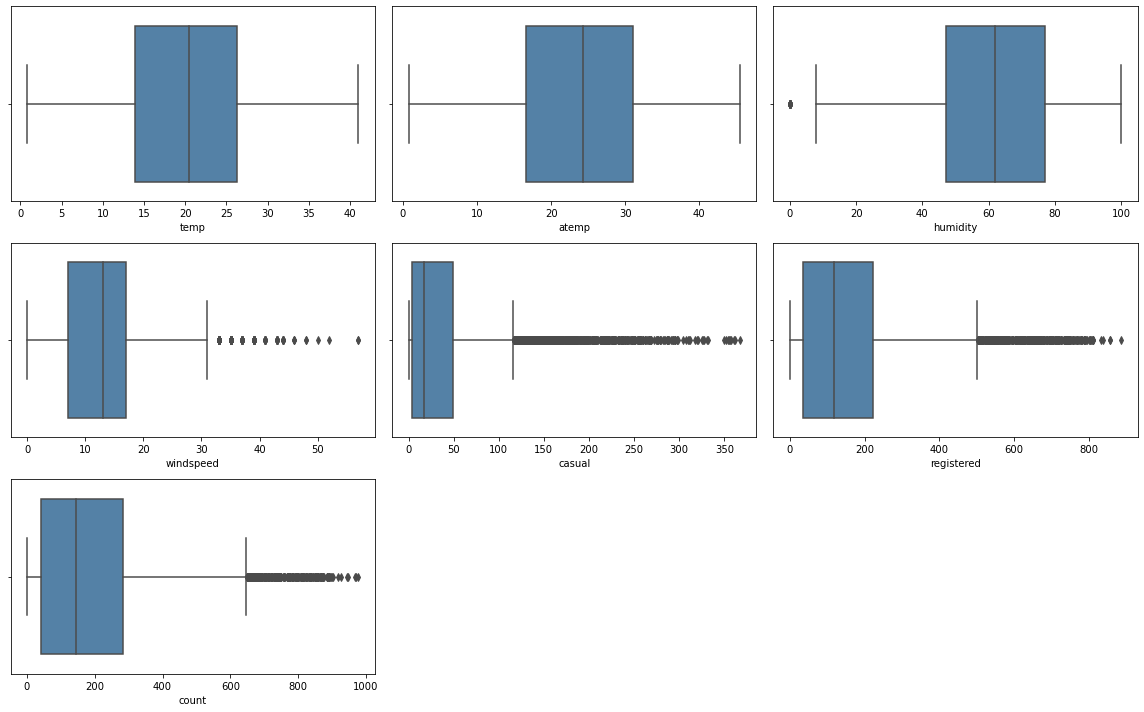

In [16]:
# Boxplot of numerical variables
plt.figure(figsize=(16,10))
for ind, col in enumerate(num_cols):
    plt.subplot(3, 3, ind + 1)
    sns.boxplot(x=train_eda[col], color=blue)
plt.tight_layout()
plt.show()

The box plot confirms the above assumption that `windspeed`, `casual`, `registered` and `count` columns contains outliers. We need to detect outliers in those variables before building models.

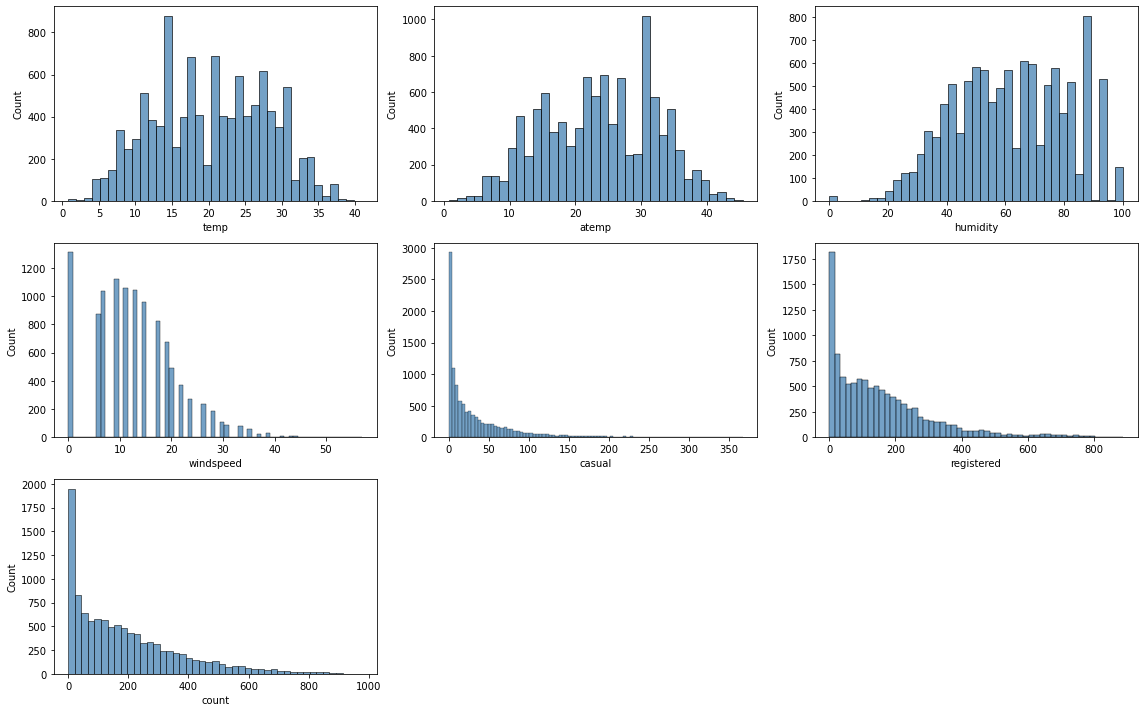

In [17]:
# Histogram of numerical variables
plt.figure(figsize=(16,10))
for ind, col in enumerate(num_cols):
    plt.subplot(3, 3, ind + 1)
    sns.histplot(x=train_eda[col], color=blue)
plt.tight_layout()
plt.show()

The histogram shows that `temp`, `atemp`, `humidity` and `windspeed` look approximately normal distributions, wheares `casual`, `registered`, `count` are skewed a little at the right. 

## Distributions of categorical variables

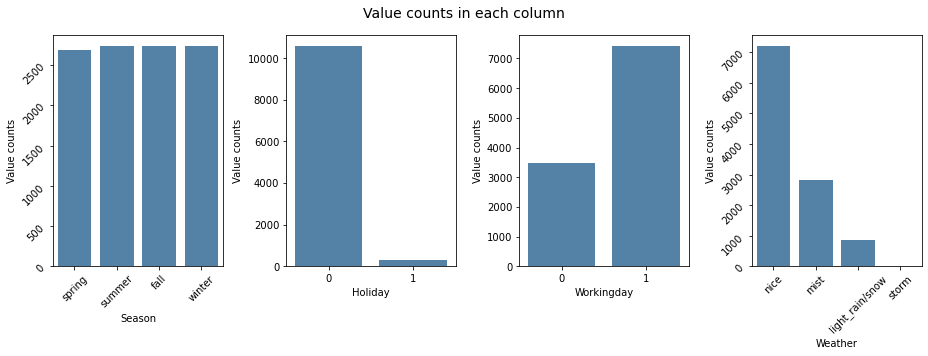

In [18]:
n = len(cat_cols)
fig, ax = plt.subplots(1, n, figsize=(13,5))
for ind, col in enumerate(cat_cols):
    a = sns.countplot(data=train_eda, x=col, ax=ax[ind], color=blue)
    if ind in [0, 3]:
        a.tick_params(rotation=45)
    a.set_ylabel("Value counts")
    a.set_xlabel(col.title())
plt.suptitle("Value counts in each column", fontsize=14)
plt.tight_layout()
plt.show()

- We can see that the number of each season are pretty much similar, the number of non-holiday days dominates the number of holidays, and the number of workingday is about twice higher than the number of days off. These observations seem reasonable because the dataset time range from the beginning of 2011 to the end of 2012, which is about two entire years.
- However, it is interesting that the number of days that had storm are very few, which is very unusual.

## Rental count over time

**Extract time to explore the rental count over time**

In [19]:
# # Create a function to extract year, month, day, hour from datetime column
# def extract_time(df):
#     df_extract = df.copy()
#     type_time = ['year', 'month', 'day', 'hour']
#     for time in type_time:
#         df_extract[time] = getattr(df_extract.datetime.dt, time)
#     return df_extract

In [20]:
# Extract time from the dataset
type_time = ['year', 'month', 'day', 'hour']
for time in type_time:
        train_eda[time] = getattr(train_eda.datetime.dt, time)
# Get day names
train_eda['day_name'] = train_eda.datetime.dt.day_name().str[:3]


### Average and total rental count by season and weather

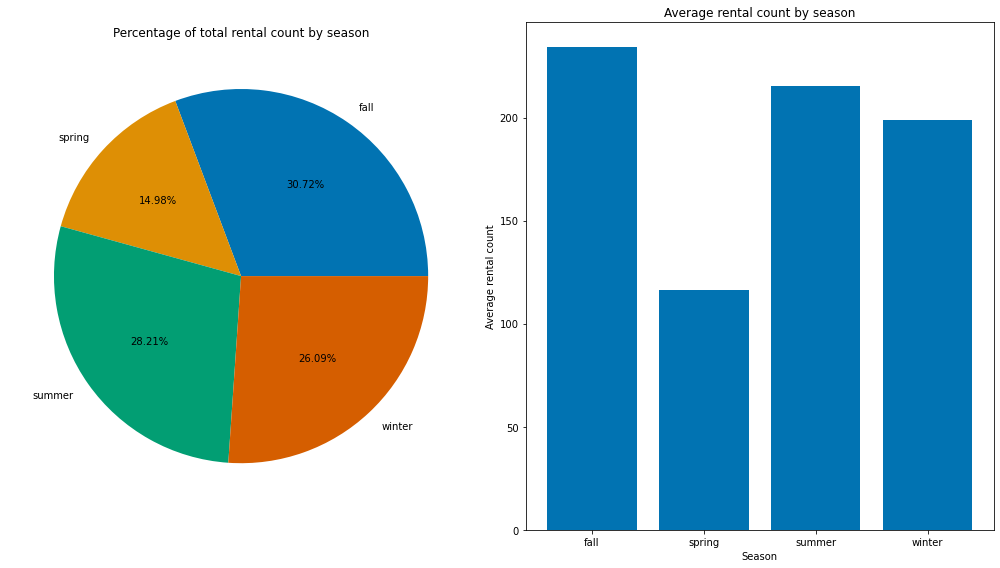

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))

season_sum = train_eda.groupby('season')['count'].sum()
ax[0].pie(season_sum, 
          labels=season_sum.index,
         autopct='%1.2f%%')
ax[0].set_title("Percentage of total rental count by season")

season_mean = train_eda.groupby('season')['count'].mean()
ax[1].bar(season_mean.index, season_mean)
ax[1].set_title("Average rental count by season")
ax[1].set_xlabel("Season")
ax[1].set_ylabel("Average rental count")

plt.tight_layout()
plt.show()

- It looks like that the total bike rental count is greatest in the fall as well as the average rental count, following by the summer, the winter and the spring. 

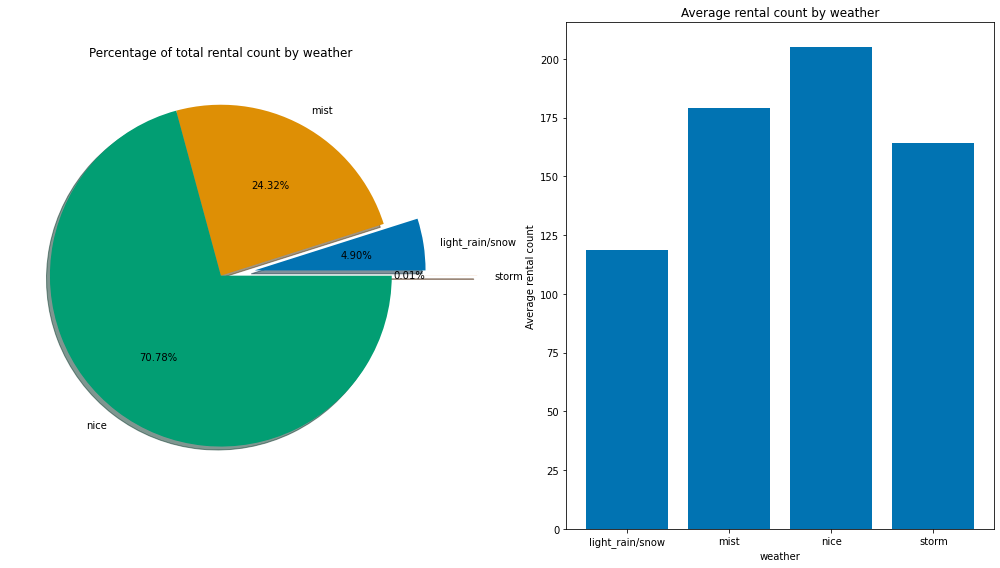

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))

weather_sum = train_eda.groupby('weather')['count'].sum()
ax[0].pie(weather_sum,
          explode=[0.2, 0, 0, 0.5],
          labels=weather_sum.index,
         autopct='%1.2f%%',
         shadow=True)
ax[0].set_title("Percentage of total rental count by weather")

weather_mean = train_eda.groupby('weather')['count'].mean()
ax[1].bar(weather_mean.index, weather_mean)
ax[1].set_title("Average rental count by weather")
ax[1].set_xlabel("weather")
ax[1].set_ylabel("Average rental count")

plt.tight_layout()
plt.show()

- Majority of rental count occured in nice weather.
- Although the number of days with storm is very few to none, the rental count on storm days was still very high on average in comparison with other types of weather.

### Aveage rental count by year, month, day, and hour

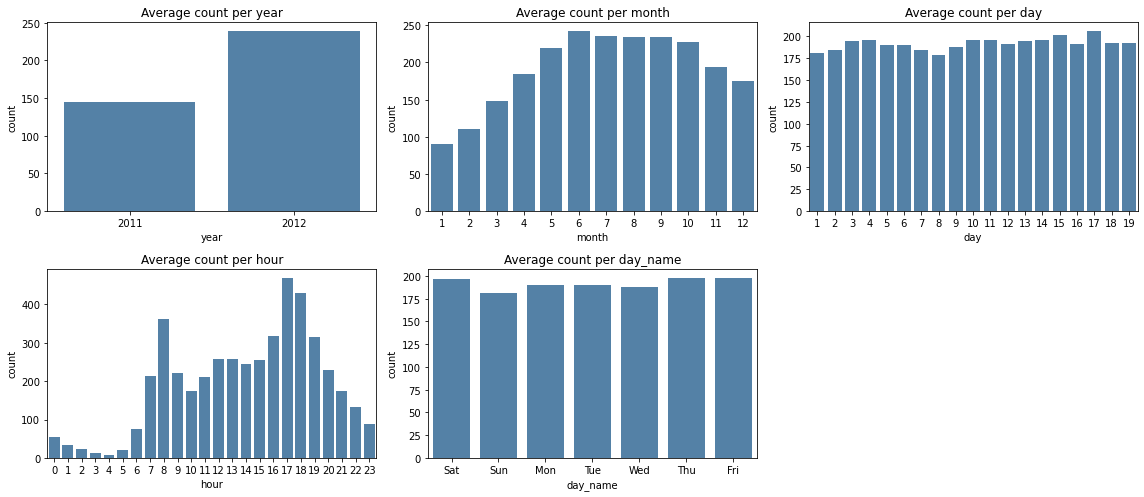

In [23]:
type_time = ['year', 'month', 'day', 'hour', 'day_name']
plt.figure(figsize=(16,10))
for ind, time in enumerate(type_time):
    plt.subplot(3, 3, ind + 1)
    sns.barplot(data=train_eda, x=time, y='count', ci=None,color=blue).set_title(f"Average count per {time}")

plt.tight_layout()
plt.show()

Some insights we can get from this plot:
- The average rental count in 2012 was almost twice higher than that of in 2011.
- The highest average rental count took place from June to October.
- The average rent count was about the same in terms of day of month and day of week.
- The highest average rental count occured in the morning around 7-9AM, and in the evening around 17-18PM, during a day. 

### Average count in hour compared between holiday, working day, season, weather

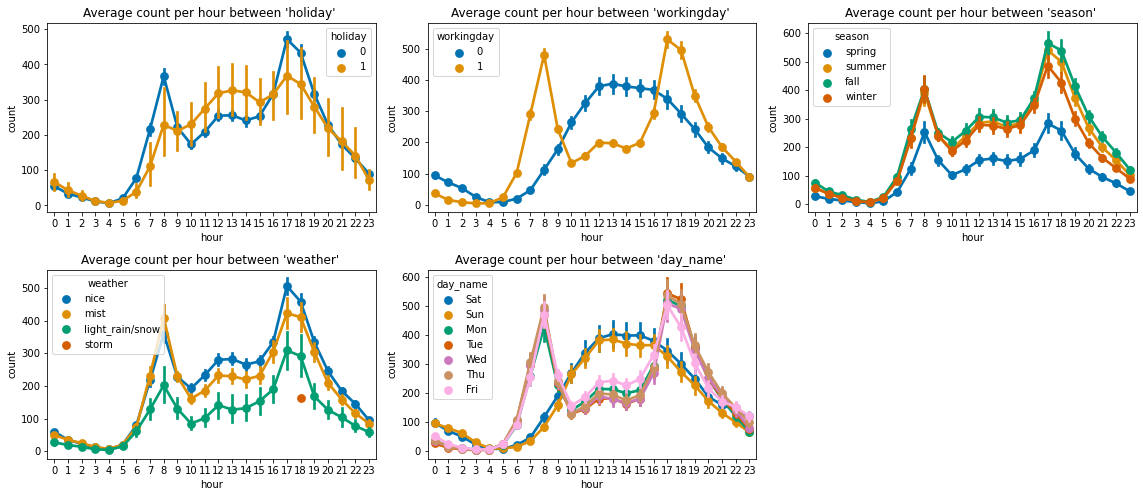

In [24]:
cats = ['holiday', 'workingday', 'season', 'weather', 'day_name']
plt.figure(figsize=(16,10))
for ind, cat in enumerate(cats):
    plt.subplot(3, 3, ind + 1)
    sns.pointplot(data=train_eda, x='hour', y='count', hue=cat).set_title(f"Average count per hour between '{cat}' ")
    
plt.tight_layout()
plt.show()

There are some interesting insights from this plot.
- During a day, there is a difference in rental count around 7-8 AM and 5-6 PM on holidays, the same for days off. The reasonable explanation could be that people did not go to work on those days so that the demand for bike rental was much less than that in normal days.
- The demand for bike rental was highest in the fall with just a little difference from the summer and the winter though, whereas it was lowest in the spring.
- Also, the nice weather increased the demand for bike rental.
- Obviously, on weekdays, higher demand for bike rental occured in the morning and the evening since people went to work and went to home at those times. On weekends, people tended to rent bikes later during the day to hang out, maybe. 

## Casual rental count and registered rental count over time

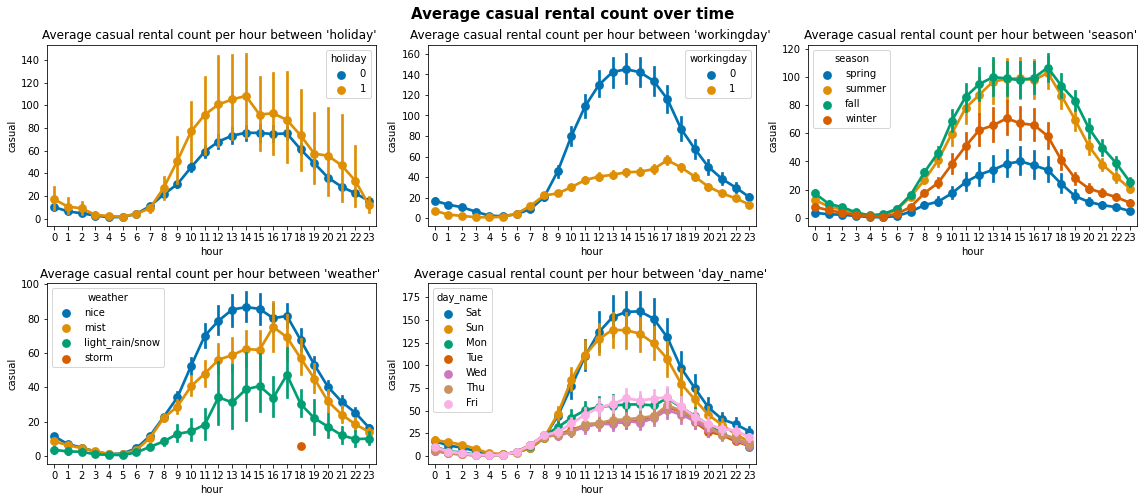

In [25]:
cats = ['holiday', 'workingday', 'season', 'weather', 'day_name']
plt.figure(figsize=(16,10))
for ind, cat in enumerate(cats):
    plt.subplot(3, 3, ind + 1)
    sns.pointplot(data=train_eda, x='hour', y='casual', hue=cat).set_title(f"Average casual rental count per hour between '{cat}' ")
plt.suptitle("Average casual rental count over time", fontweight='bold', fontsize=15)    
plt.tight_layout()
plt.show()

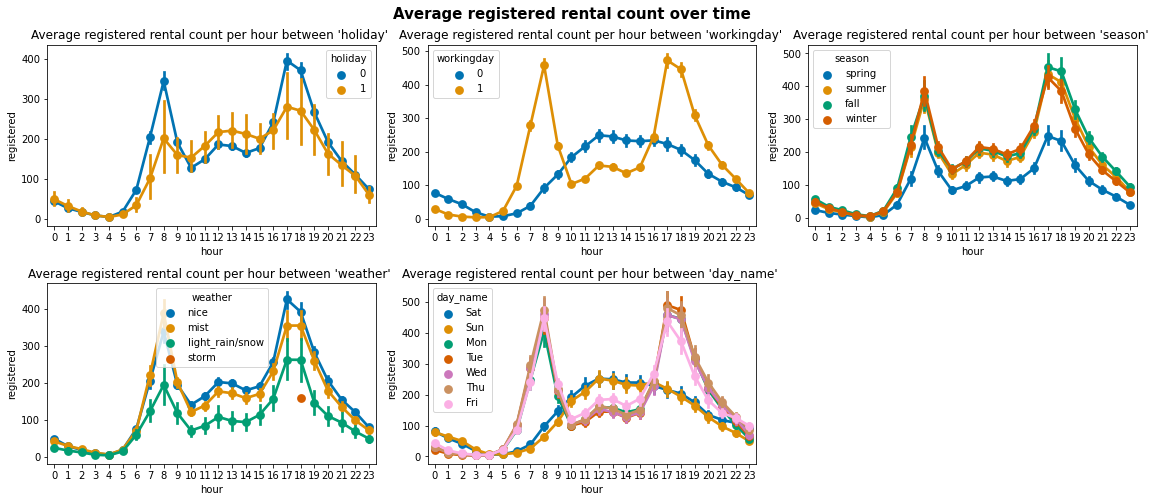

In [26]:
cats = ['holiday', 'workingday', 'season', 'weather', 'day_name']
plt.figure(figsize=(16,10))
for ind, cat in enumerate(cats):
    plt.subplot(3, 3, ind + 1)
    sns.pointplot(data=train_eda, x='hour', y='registered', hue=cat).set_title(f"Average registered rental count per hour between '{cat}' ")
plt.suptitle("Average registered rental count over time", fontweight='bold', fontsize=15)       
plt.tight_layout()
plt.show()

We can see some differences in casual bike rentals and registered bike rentals:
- Registered bike rentals mostly utilize bikes during working days, which can be seen easily at 7AM and 5PM. This can be attributed to regular school and office commuters who rely on bicycles as their primary mode of transportation during these times.
- In contrast, non-registered bike rentals mostly utilize bike during non-working day and tend to rent bikes later during the day, around 10AM to 4PM. This trend can be explained by people using bike rentals for their leisure activities during this time of the day.


## Correlation heatmap

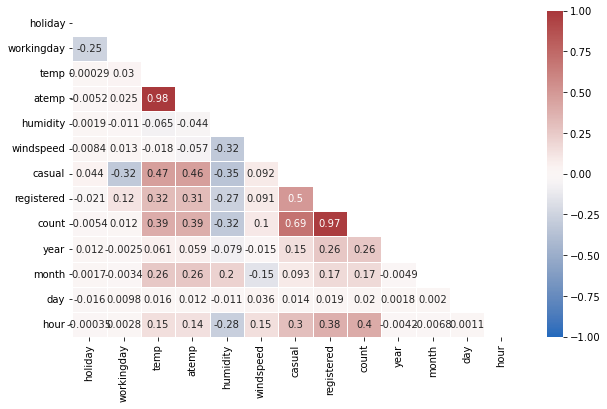

In [27]:
plt.figure(figsize=(10,6))
corr = train_eda.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, linewidth=0.5, annot=True, fmt='.2g')
plt.show()

- There is a strong correlation between `temp` and `atemp`.
- There is no multicollinearity between other variables

## A closer look between `count` vs `temp`, `humidity` and `windspeed`



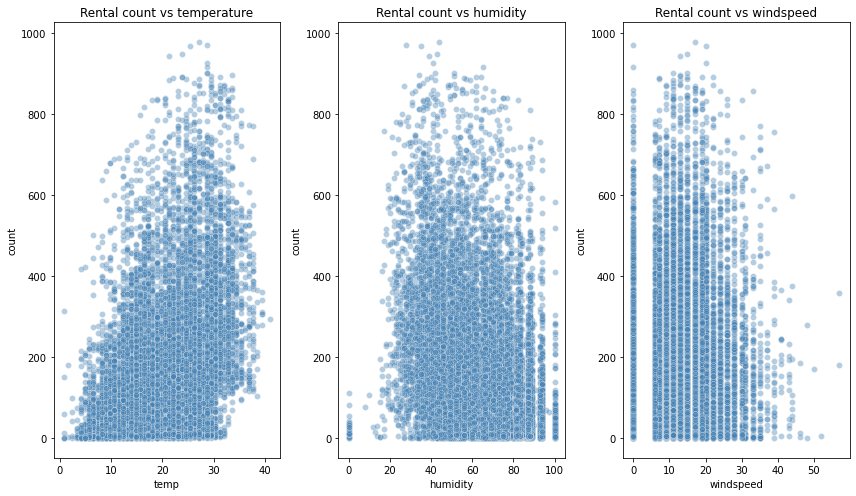

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(12,7))
sns.scatterplot(data=train_eda, y='count', x='temp', alpha=0.4, color=blue, ax=ax[0]).set_title("Rental count vs temperature")
sns.scatterplot(data=train_eda, y='count', x='humidity', alpha=0.4, color=blue, ax=ax[1]).set_title("Rental count vs humidity")
sns.scatterplot(data=train_eda, y='count', x='windspeed', alpha=0.4, color=blue, ax=ax[2]).set_title("Rental count vs windspeed")
plt.tight_layout()
plt.show()

The plot confirms that there is no obvious correlation between `count` vs `temp`, `humudity` and `windspeed`.

# Hypothesis testing

**Does average rental count differ between holidays and casual days and between working days and days off?**

In [29]:
# 'holiday' value counts
df_train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

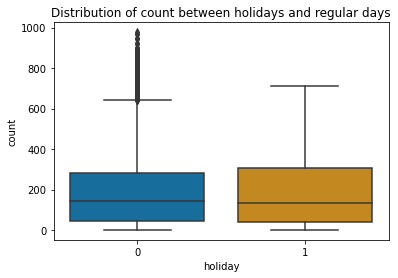

In [30]:
sns.boxplot(data=df_train, x='holiday', y='count').set_title("Distribution of count between holidays and regular days")
plt.show()

In [31]:
# 'workingday' value counts
df_train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

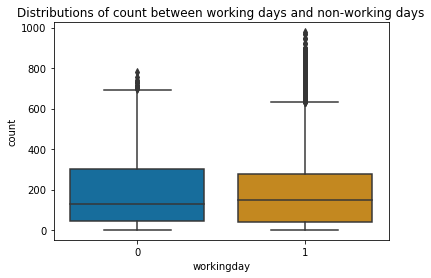

In [32]:
sns.boxplot(data=df_train, x='workingday', y='count').set_title("Distributions of count between working days and non-working days")
plt.show()

- There is a big difference in sample size in `holiday` column (10575 vs. 311) and in `workingday` (7412 vs. 3474). From the boxplots we can see that their averages retal count are not much different.
- Perform **Welch's t-test** to check the above hypothesis when their variances are slightly different. (Read [here](https://www.statology.org/t-test-unequal-sample-size/#:~:text=The%20short%20answer%3A,made%20in%20a%20t%2Dtest.) for more details.) 

## Is there a difference in average rental count between holidays and normal days?  

Using two-sample t-test:

$H_{0}$: There is no difference in average rental count between holidays and regular days.  
$H_{1}$: There is a difference in average rental count between holidays and regular days.

Choose 5% as the significance level.

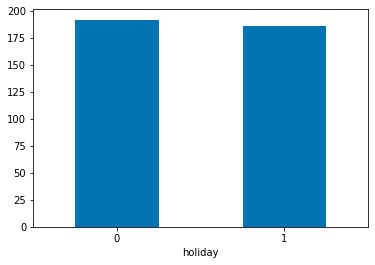

In [33]:
df_train.groupby('holiday')['count'].mean().plot(kind='bar',)
plt.xticks(rotation=0)
plt.show()

In [34]:
holiday_count = df_train.query('holiday == 1')['count']
normal_day_count = df_train.query('holiday == 0')['count']
p_value = stats.ttest_ind(holiday_count, normal_day_count, equal_var=False).pvalue
print(f"p-value of the test: {p_value}")

p-value of the test: 0.5461309933605478


The p-value is 0.546 which is way larger than 0.05, so we fail to reject the null hypothesis. We can conclude that there is no significant difference in average rental count between holidays and regular days.

## Is there a difference in average rental count between working days and non-working days?  

Using two-sample t-test:

$H_{0}$: There is no difference in average rental count between working days and days off.  
$H_{1}$: There is a difference in average rental count between working days and days off.

Choose 5% as the significance level.

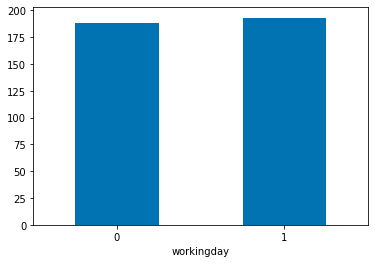

In [35]:
df_train.groupby('workingday')['count'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [36]:
workingday_count = df_train.query('workingday == 1')['count']
normal_day_count = df_train.query('workingday == 0')['count']
p_value = stats.ttest_ind(workingday_count, normal_day_count, equal_var=False).pvalue
print(f"p-value of the test: {p_value}")

p-value of the test: 0.21640312280695098


The p-value is 0.216 which is bigger than 0.05, so we fail to reject the null hypothesis. We can conclude that there is no significant difference in average rental count between working days and non-working days.

# Data Preprocessing

In [37]:
df_train_cleaned = df_train.copy()

#Since 'registered' and 'casual' columns don't exist in the test set, we can drop them.
df_train_cleaned.drop(columns=['registered', 'casual'], inplace=True)

# Concatnate both train and test set to do feature engineering at the same time 
df_train_cleaned['train_set'] = 1
df_test['train_set'] = 0

# Create 'count' column that contains missing values in the test set before concatenating
df_test['count'] = np.nan

# Concate both training and test sets
all_data_raw = pd.concat([df_train_cleaned, df_test])

# Dummy 'season' column
season_dummies = pd.get_dummies(all_data_raw['season']).rename(columns={1:"spring", 2:'summer', 3:'fall', 4:'winter'})
all_data_raw = pd.concat([all_data_raw, season_dummies], axis=1).drop(columns='season')

# Dummy 'weather' column
weather_dummies = pd.get_dummies(all_data_raw['weather']).rename(columns={1:'nice_weather', 2:'mist_weather', 3:'light_rain_snow', 4:'storm'})
all_data_raw = pd.concat([all_data_raw, weather_dummies], axis=1).drop(columns='weather')

# Extract year, month, day, hour from 'datetime' column
# all_data['year'] = all_data['datetime'].dt.year.map({2011:0, 2012:1})
all_data_raw['month'] = all_data_raw['datetime'].dt.month
all_data_raw['day'] = all_data_raw['datetime'].dt.day
all_data_raw['dayofweek'] = all_data_raw['datetime'].dt.dayofweek
all_data_raw['hour'] = all_data_raw['datetime'].dt.hour

# Drop 'datetime' column
all_data_raw.drop(columns=['datetime'], inplace=True)

# Split the entire dataset into training and test sets again
train_raw = all_data_raw.loc[all_data_raw['train_set'] == 1].drop(columns='train_set')
X_test_raw = all_data_raw.loc[all_data_raw['train_set'] == 0].drop(columns=['count', 'train_set'])

# Model building, using raw datasets

**Choose the Root Mean Squared Logarithmic Error (RMSLE) as the main metric**



In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import make_scorer

In [39]:
# Split the train set into train and validation sets
X = train_raw.drop(columns="count")
y = train_raw['count'].values

# Since the target variable is skewed on the right side, I'll normalize it using the natural log transformation.
y  = np.log(y)

# Split the dataset into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


In [40]:
# Create a list of different baseline models
models = [("Linear Regression", LinearRegression()),
        ("Lasso", Lasso(random_state=42)),
        ("Ridge", Ridge(random_state=42)),
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("XGBoost", XGBRegressor(random_state=42))]



In [41]:
# Create a result table
results1 = pd.DataFrame(columns=['Model', 'RMSLE on RAW training set', 'RMSLE on RAW test set'])

for model_name, model_obj in models:    
    scores = get_scores(model_name, model_obj, X_train, y_train, X_val, y_val)
    results1.loc[len(results1)] = scores
results1

♦ Model name:  Linear Regression
RMSLE on training set: 1.027994
RMSLE on test set: 1.032837
--------------------------------------------------
♦ Model name:  Lasso
RMSLE on training set: 1.068522
RMSLE on test set: 1.069699
--------------------------------------------------
♦ Model name:  Ridge
RMSLE on training set: 1.028013
RMSLE on test set: 1.032839
--------------------------------------------------
♦ Model name:  Random Forest
RMSLE on training set: 0.138499
RMSLE on test set: 0.371354
--------------------------------------------------
♦ Model name:  XGBoost
RMSLE on training set: 0.193309
RMSLE on test set: 0.335282
--------------------------------------------------


,Model,RMSLE on RAW training set,RMSLE on RAW test set
0,Linear Regression,1.027994,1.032837
1,Lasso,1.068522,1.069699
2,Ridge,1.028013,1.032839
3,Random Forest,0.138499,0.371354
4,XGBoost,0.193309,0.335282


# Model building with Feature Engineering



In [42]:
all_data_cleaned = all_data_raw.copy().reset_index(drop=True)

## Remove outliers

In [43]:
# Find the series that indicates z-score of 'count' columns where 'train_set' == 1 which means the training set.
count_zscore = stats.zscore(all_data_cleaned.loc[all_data_cleaned['train_set'] == 1, 'count'])

# Creat boolean 'mask' as True representing outlying values which is in the training set and lower or greater than 3 standard deviation.
# We find that there are 147 outlying values, the same number we found in Analyzing phase.
mask = (all_data_cleaned['train_set'] == 1) & ((count_zscore < -3) | (count_zscore > 3))
print(f"Number of outliers: {mask.sum()}")

# Filter the dataset
all_data_cleaned = all_data_cleaned.loc[~mask]


Number of outliers: 147



## Extract `temp` column to a categorical variable:
- **<10**: Cold
- **10-17**: Chilly
- **18-25**: Warm
- **25-32**: Hot
- **>32**: Very hot  

then dummy it.

In [44]:
# Extract 'temp' column to a categorical variable:

labels = ['cold', 'chilly', 'warm', 'hot']
bins = [-np.inf, 10, 18, 26, np.inf]
temp_cat = pd.cut(all_data_cleaned['temp'],bins=bins, labels=labels)
temp_dummies = pd.get_dummies(temp_cat)
all_data_cleaned = pd.concat([all_data_cleaned, temp_dummies], axis=1)

## Create a new column named `rush_hour`

Define `rush_hour` column based on `hour` colum. It has a value of **1** when the `hour` is from `6-9`AM or `16-19`PM, otherwise **0**.

In [45]:
# Create 'rush_hour'
all_data_cleaned['rush_hour'] = all_data_cleaned['hour'].apply(lambda x: 1 if 6<=x<=9 or 16<=x<=19 else 0)


## Drop unnecessary variables  

- Drop `atemp` to avoid multicollinearity.
- Drop `windspeed` because this column contains many missing values and has no correlation with the target variable.

In [46]:
all_data_cleaned.drop(columns=['atemp', 'windspeed'], inplace=True)

## Split the dataset

In [47]:
# Split the entire dataset into training and test sets again
train_cleaned = all_data_cleaned.loc[all_data_cleaned['train_set'] == 1].drop(columns='train_set')
X_test_cleaned = all_data_cleaned.loc[all_data_cleaned['train_set'] == 0].drop(columns=['count','train_set'])


## Model building using cleaned dataset

In [48]:
# Split the train set into training and validation sets
X_cleaned = train_cleaned.drop(columns="count")
y_cleaned = train_cleaned['count'].values

# Normalize the target variable
y_cleaned = np.log(y_cleaned)

# Split the dataset into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_cleaned, y_cleaned, test_size=0.25, random_state=42)


In [49]:
# Create a list of different baseline models
models = [("Linear Regression", LinearRegression()),
        ("Lasso", Lasso(random_state=42)),
        ("Ridge", Ridge(random_state=42)),
        ("Random Forest", RandomForestRegressor(random_state=42)),
        ("XGBoost", XGBRegressor(random_state=42))]



In [50]:
# Create a result table
results2 = pd.DataFrame(columns=['Model', 'RMSLE on CLEANED training set', 'RMSLE on CLEANED test set'])

for model_name, model_obj in models:
    scores = get_scores(model_name, model_obj, X_train, y_train, X_val, y_val)
    results2.loc[len(results2)] = scores


♦ Model name:  Linear Regression
RMSLE on training set: 0.922773
RMSLE on test set: 0.905045
--------------------------------------------------
♦ Model name:  Lasso
RMSLE on training set: 1.071176
RMSLE on test set: 1.051958
--------------------------------------------------
♦ Model name:  Ridge
RMSLE on training set: 0.922777
RMSLE on test set: 0.905038
--------------------------------------------------
♦ Model name:  Random Forest
RMSLE on training set: 0.139687
RMSLE on test set: 0.363556
--------------------------------------------------
♦ Model name:  XGBoost
RMSLE on training set: 0.198986
RMSLE on test set: 0.319755
--------------------------------------------------


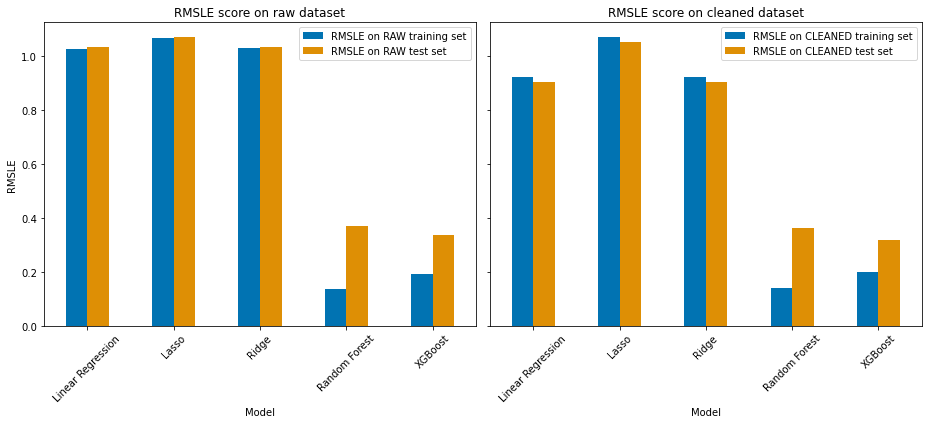

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(13,6), sharey=True)

results1.set_index('Model').plot(kind='bar', ax=ax[0], title='RMSLE score on raw dataset', ylabel='RMSLE',)
results2.set_index('Model').plot(kind='bar', ax=ax[1], title='RMSLE score on cleaned dataset', ylabel='RMSLE')
ax[0].tick_params('x', rotation=45)
ax[1].tick_params('x', rotation=45)
fig.tight_layout()
fig.savefig('images/baseline_models_comparison.jpg', bbox_inches='tight')
plt.show()

Some information we gain from this:
- Random Forest and XGBoost outperform three other regression models as the RMSLE on both the cleaned and raw test sets of those are about tripple less than those of other model. 
- Also, it's obvious that all the models performed better after appyling feature engineering.
- Nonetheless,  Random Forest and XGBoost seem to overfit since the RMSLE scores on the test set are way greater than those on the training set.
- In the next step, we'll do hyperparameter tuning to find the best estimator that helps reduce overfitting and make better prediction.

# Model Tuning

In [53]:
# Create a RMSLE scorer for `scoring` parameter
rmsle_scoring = make_scorer(RMSLE, greater_is_better=False)

results3 = pd.DataFrame(columns=['Model', 'RMSLE on training set', 'RMSLE on test set'])

## Lasso

In [54]:
ls = Lasso(random_state=42)
cv_params = {'alpha': [i/50 for i in range(1, 20)],
            'max_iter': [500, 1000, 1500]}
ls_cv = GridSearchCV(ls, cv_params, cv=5, scoring=rmsle_scoring)

In [55]:
%%time
ls_cv.fit(X_train, y_train)

Wall time: 1.56 s


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,
                                   0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3,
                                   0.32, 0.34, 0.36, 0.38],
                         'max_iter': [500, 1000, 1500]},
             scoring=make_scorer(RMSLE, greater_is_better=False))

In [56]:
best_ls = ls_cv.best_estimator_
ls_result = get_scores_tuning("Tuning Lasso", best_ls, X_train, y_train, X_val, y_val)
results3.loc[len(results3)] = ls_result

♦ Model name:  Tuning Lasso
RMSLE on training set: 0.929638
RMSLE on test set: 0.913126
--------------------------------------------------


## Ridge

In [57]:
rg = Ridge(random_state=42)
cv_params = {'alpha': [i/50 for i in range(1, 20)],
            'max_iter': [500, 1000, 1500]}
rg_cv = GridSearchCV(rg, cv_params, cv=5, scoring=rmsle_scoring)

In [58]:
%%time
rg_cv.fit(X_train, y_train)

Wall time: 1.16 s


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,
                                   0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3,
                                   0.32, 0.34, 0.36, 0.38],
                         'max_iter': [500, 1000, 1500]},
             scoring=make_scorer(RMSLE, greater_is_better=False))

In [59]:
best_rg = rg_cv.best_estimator_
rg_result = get_scores_tuning('Tuning Ridge', best_rg, X_train, y_train, X_val, y_val)
results3.loc[len(results3)] = rg_result

♦ Model name:  Tuning Ridge
RMSLE on training set: 0.922773
RMSLE on test set: 0.905045
--------------------------------------------------


## Random Forest

**Note:** After fitting the model, save the trained model object to pickle file, so we can use it without fitting again whenever we restart this notebook.

In [60]:
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1, 2],
             'max_samples': [0.7, 1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

rf = RandomForestRegressor(random_state=42)
# rf_cv = RandomizedSearchCV(rf, cv_params, cv=5, scoring=rmsle_scoring)
rf_cv = GridSearchCV(rf, cv_params, cv=5, scoring=rmsle_scoring)

In [61]:
# %%time
# rf_cv.fit(X_train, y_train)

In [62]:
# Wall time: 8min 4s
# GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
#              param_grid={'max_depth': [3, 5, None], 'max_features': [1, 2],
#                          'max_samples': [0.7, 1], 'min_samples_leaf': [1, 2, 3],
#                          'min_samples_split': [2, 3, 4],
#                          'n_estimators': [300, 500]},
#              scoring=make_scorer(RMSLE, greater_is_better=False))

<!-- Wall time: 7min 59s
GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1, 2],
                         'max_samples': [0.7, 1], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             scoring=make_scorer(RMSLE, greater_is_better=False)) -->

In [63]:
# write_pickle(rf_cv, "rf_cv_obj")

In [64]:
# Read the model object that was already trained
rf_cv = read_pickle('rf_cv_obj')

In [65]:
best_rf = rf_cv.best_estimator_
rf_result = get_scores_tuning("Best Random Forest", rf_cv, X_train, y_train, X_val, y_val)
results3.loc[len(results3)] = rf_result

♦ Model name:  Best Random Forest
RMSLE on training set: 0.239129
RMSLE on test set: 0.472840
--------------------------------------------------


## XGBoost

In [66]:
cv_params = {'max_depth': [4, 6, None],
              'min_child_weight': [2, 3, 5],
              'learning_rate': [0.01, 0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              # 'subsample': [0.7],
              # 'colsample_bytree': [0.7]
              }
xgb = XGBRegressor(random_state=42)
xgb_cv = GridSearchCV(xgb, cv_params, scoring=rmsle_scoring)

In [67]:
# %%time
# xgb_cv.fit(X_train, y_train)

In [68]:
# write_pickle(xgb_cv, "xgb_cv_obj")

In [69]:
# Read the model object that was already trained
xgb_cv = read_pickle('xgb_cv_obj')

In [70]:
best_xgb = xgb_cv.best_estimator_
xgb_result = get_scores_tuning("Best XGBoost", best_xgb, X_train, y_train, X_val, y_val)
results3.loc[len(results3)] = xgb_result

♦ Model name:  Best XGBoost
RMSLE on training set: 0.335666
RMSLE on test set: 0.375896
--------------------------------------------------


## Results

,Model,RMSLE on training set,RMSLE on test set
0,Tuning Lasso,0.929638,0.913126
1,Tuning Ridge,0.922773,0.905045
2,Best Random Forest,0.239129,0.472840
3,Best XGBoost,0.335666,0.375896


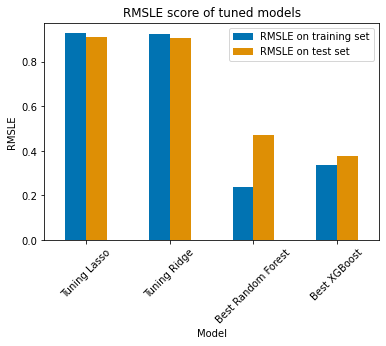

In [71]:
display(results3)
results3.set_index("Model").plot(kind='bar', title='RMSLE score of tuned models', ylabel='RMSLE')
plt.tick_params('x', rotation=45)
plt.savefig('images/tuned_models.jpg', bbox_inches='tight')
plt.show()

- Lasso and Ridge with hyperparameter tuning produced lower RMSLE score and less overfitting but still greatly different in comparison with Random Forest and XGBoost.
- Although Random Forest and XGBoost with hyperparameter tuning outperformed Lasso and Ridge, their RMSLE score were a little larger compared with their baseline model. Besides, there is a bit gap between training and test RMSLE score for Random Forest, indicating  high overfitting. Meanwhile, XGBoost performance were better than Random Forest and less overfitting.


# Predict on the test set and submit the results

**Note:** *Since I've taken the natural logarithm of the target variable before building the models, I then have to take exponential of the predicted values to get the actual predicted rental count.*

In [72]:
# XGB CV
best_xgb = xgb_cv.best_estimator_
xgb_cv_y_pred = best_xgb.predict(X_test_cleaned)
xgb_cv_y_pred_exp = np.exp(xgb_cv_y_pred)

sub1 = pd.DataFrame({'datetime':df_test.datetime, 'count':xgb_cv_y_pred_exp})
sub1.to_csv('Submissions/best_xgb_sub1.csv', index=False)
# Private and public score: 0.47501

# RF CV
best_rf = rf_cv.best_estimator_
rf_cv_y_pred = best_rf.predict(X_test_cleaned)
rf_cv_y_pred_exp = np.exp(rf_cv_y_pred)

sub2 = pd.DataFrame({'datetime':df_test.datetime, 'count':rf_cv_y_pred_exp})
sub2.to_csv('Submissions/best_rf_sub2.csv', index=False)
# Private and public score: 0.59508

#Ensemble results
y_ensemble = 0.75*xgb_cv_y_pred + 0.25*rf_cv_y_pred
y_ensemble_exp = np.exp(y_ensemble)

sub3 = pd.DataFrame({'datetime':df_test.datetime, 'count':y_ensemble_exp})
sub3.to_csv('Submissions/ensemble3.csv', index=False)
# Private and public score: 0.47496


|Model|Public RMSLE|Private RMSLE|
|------|------|------|
|XGBoost|0.47501|0.47501|
|Random Forest|0.59508|0.59508|
|XGBoost & RandomForest|0.47496|0.47496|

**Results from Kaggle:**
- XGBoost model provided public and private score 0.47501, while this number is 0.59508 for Random Forest model. 
- When combining the results of two models with the ratio XGBoost:RandomForest = 0.75:0.25, we got the score of 0.47496 on both public and private leaderboard.
- We can see XGBoost model is the best model using RMSLE as the key metric.

# Conclusion

In summary, this notebook conducted a comprehensive analysis of hourly bike rental data spanning two years. It encompassed data exploration, preprocessing, and feature engineering to prepare the data for modeling. The exploratory data analysis provided valuable insights into rental patterns based on different factors, such as weather, day of the week, and hour of the day.

The model selection process involved evaluating three regression algorithms, ultimately identifying the Random Forest model as the best performer based on the Root Mean Squared Logarithmic Error (RMSLE) metric. This model was then utilized to predict bike rental counts on the test data, and the results were submitted for evaluation.

Notably, the analysis unveiled intriguing patterns, showcasing the distinct rental behaviors between registered users and casual users. The findings indicated that registered users primarily used bikes for their daily work commute, whereas casual users showed higher rentals during weekends, likely for recreational purposes.

However, future improvements could involve exploring additional features, employing advanced feature selection techniques, and experimenting with various regression algorithms to further enhance the model's accuracy and generalizability. The analysis and insights presented here can provide valuable guidance for bike-sharing companies to optimize their services and meet the diverse preferences of their user base.